In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn2_circles
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.serif'] = 'Arial'
mpl.rcParams['pdf.fonttype'] = 42
%matplotlib inline

In [2]:
drugs_rank = pd.read_csv('../../map_drugs/drugs_rank.csv')

In [4]:
drugs = pd.read_csv('../../map_drugs/drug_targets_dir_maxphase.csv')
all_drugs = drugs['ChEMBL'].unique()

clinicaltrial = pd.read_csv('../../map_drugs/clinicaltrial.csv')
clinicaltrial_all = clinicaltrial[(clinicaltrial['ChEMBL'].isin(drugs_rank['CHEMBL ID'].values))&(clinicaltrial['Clinical_phase']>=0)]['ChEMBL'].unique()

In [8]:
repo = drugs_rank[(drugs_rank.index<100)&(drugs_rank['Clinical Phase']>=4)]['CHEMBL ID'].unique()

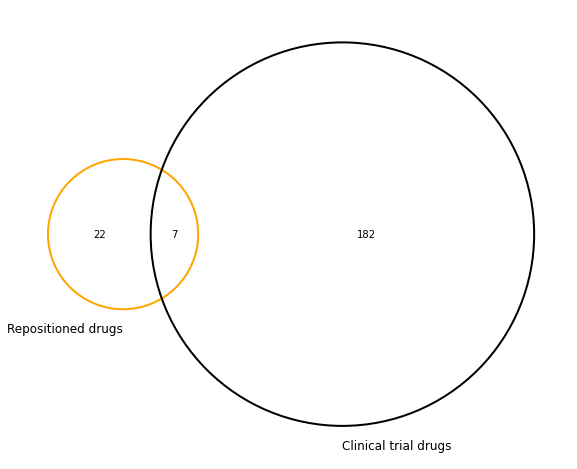

In [11]:
list_a = repo
list_b = clinicaltrial_all
f, ax = plt.subplots(figsize=(10, 10))
g = venn2([set(list_a), set(list_b)],
          ax=ax,
          set_colors=['white', 'white'],
          set_labels=['Repositioned drugs', 'Clinical trial drugs'])
v = venn2_circles(
    [set(list_a), set(list_b)],
    ax=ax,
)
v[0].set_edgecolor('orange')
v[1].set_edgecolor('black')
f.savefig('./Fig3b.pdf')

---

In [2]:
drugs_rank = pd.read_csv('../../map_drugs/drugs_rank.csv')

In [3]:
clinicaltrial = pd.read_csv('../../map_drugs/clinicaltrial.csv')
clinicaltrial_all = clinicaltrial[(clinicaltrial['ChEMBL'].isin(drugs_rank['CHEMBL ID'].values))&(clinicaltrial['Clinical_phase']>=0)]['ChEMBL'].unique()

In [4]:
repo = drugs_rank[(drugs_rank.index<100)&(drugs_rank['Clinical Phase']>=0)]

In [5]:
repo

,Drug,CHEMBL ID,Clinical Phase,D2V Score,Comorbidity,Comorbidity Counts,Rating Score,Clinical Trial
0,SOPHORETIN,CHEMBL50,3.0,39.083333,Essential Hypertension,1.0,40.083333,1
1,GSK-690693,CHEMBL494089,1.0,35.500000,Essential Hypertension,1.0,36.500000,0
2,BOSUTINIB,CHEMBL288441,4.0,29.375000,"Coronary Artery Disease;Diabetes Mellitus, Type 2",2.0,31.375000,0
3,EPIGALLOCATECHIN-3-GALLATE,CHEMBL297453,3.0,28.166667,NaN,0.0,28.166667,0
4,THALIDOMIDE,CHEMBL468,4.0,28.083333,NaN,0.0,28.083333,1
...,...,...,...,...,...,...,...,...
95,Ketamine,CHEMBL742,4.0,17.041667,NaN,0.0,17.041667,1
96,CHIR-99021,CHEMBL412142,0.0,17.000000,NaN,0.0,17.000000,0
97,LY-2780301,CHEMBL3545134,1.0,16.000000,Multiple Sclerosis,1.0,17.000000,0
98,DDR1/2 INHIBITOR 5N,CHEMBL4168305,0.0,16.958333,NaN,0.0,16.958333,0


In [6]:
for phase,sub_df in repo.groupby('Clinical Phase'):
    print(phase)
    print(sub_df['Clinical Trial'].value_counts())

0.0
0    26
Name: Clinical Trial, dtype: int64
1.0
0    16
Name: Clinical Trial, dtype: int64
2.0
0    17
Name: Clinical Trial, dtype: int64
3.0
0    10
1     2
Name: Clinical Trial, dtype: int64
4.0
0    22
1     7
Name: Clinical Trial, dtype: int64


In [7]:
clinicaltrial_count = pd.DataFrame(columns=['Phase','without','with'], index=range(5))
for phase in range(5):
    if phase == 0:
        cli = 'Research'
    else:
        cli = phase
    clinicaltrial_count.loc[phase] = cli, len(repo[(repo['Clinical Phase']==phase)&(repo['Clinical Trial']==0)]), len(repo[(repo['Clinical Phase']==phase)])

In [8]:
clinicaltrial_count

,Phase,without,with
0,Research,26,26
1,1,16,16
2,2,17,17
3,3,10,12
4,4,22,29


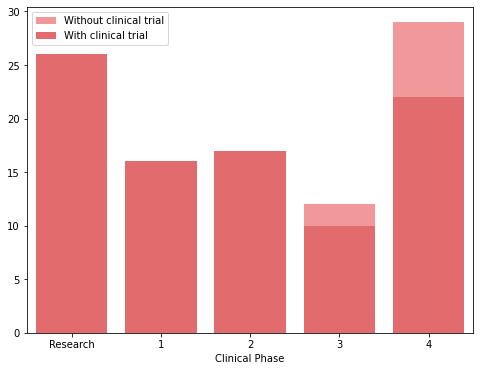

In [15]:
f, ax = plt.subplots(figsize=(8,6))
sns.barplot(x="Phase", y="with", data=clinicaltrial_count,
            label="Without clinical trial", color="#FE8A8C", ax=ax)
sns.barplot(x="Phase", y="without", data=clinicaltrial_count,
            label="With clinical trial", color="#F6575A", ax=ax)
ax.legend(ncol=1, loc="upper left", frameon=True)
ax.set_ylabel('')
ax.set_xlabel('Clinical Phase')
f.savefig('./Fig3b.pdf')